In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Example usage of calibration uncertanty envelopes for GWTC-1

This notebook contains an example in how to read, and interpret the calibration uncertainty envelopes provided at https://dcc.ligo.org/LIGO-P1900040/public.

In [2]:
def CalEnv_plot(calEnv_file, freq):
    # read in a file from the set of Calibration Envelopes
    # interpolate the data to fit the bandwidth used for this analysis
    # plot the amplitude and phase uncertanties
        
    CalEnv_raw = np.genfromtxt(calEnv_file, skip_header=1)
    
    IFO = calEnv_file.split('_')[-2]
    
    IFO_color = {'H':'#1b9e77','L':'#d95f02','V':'#7570b3'}
    
    # Show the amplitude uncertanty in terms of percentage deviations away from a theoretical
    # perfect calibration
    
    Amp_median = (1-np.interp(freq, CalEnv_raw[:,0], CalEnv_raw[:,1], left=1, right=1))*100
    Amp_lower_sigma = (1-np.interp(freq, CalEnv_raw[:,0], CalEnv_raw[:,3], left=1, right=1))*100
    Amp_upper_sigma = (1-np.interp(freq, CalEnv_raw[:,0], CalEnv_raw[:,5], left=1, right=1))*100
    
    # Show the phase uncertanty in terms of a deviation, in degrees, away from a theoretical 
    # perfect calibration
    
    Phase_median = np.interp(freq, CalEnv_raw[:,0], CalEnv_raw[:,2], left=0, right=0)*180./np.pi
    Phase_lower_sigma = np.interp(freq, CalEnv_raw[:,0], CalEnv_raw[:,4], left=0, right=0)*180./np.pi
    Phase_upper_sigma = np.interp(freq, CalEnv_raw[:,0], CalEnv_raw[:,6], left=0, right=0)*180./np.pi
    
    plt.figure(figsize=(18.0, 6.0))
    
    plt.subplot(121)
    plt.plot(freq, Amp_median, c=IFO_color[IFO], lw=5, label=IFO)
    plt.fill_between(freq, Amp_upper_sigma ,Amp_lower_sigma, color=IFO_color[IFO], alpha=0.6)
    plt.xscale('log')
    plt.xlim(freq[0], freq[-1])
    plt.legend(fontsize=20, loc='upper left')
    plt.xlabel('Frequency (Hz)', fontsize=20)
    plt.ylabel('Amplitude deviation (%)', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
        
    plt.subplot(122)
    plt.plot(freq, Phase_median, c=IFO_color[IFO], lw=5, label=IFO)
    plt.fill_between(freq, Phase_upper_sigma , Phase_lower_sigma, color=IFO_color[IFO], alpha=0.6)
    plt.xscale('log')
    plt.xlim(freq[0], freq[-1])
    plt.legend(fontsize=20, loc='upper left')
    plt.xlabel('Frequency (Hz)', fontsize=20)
    plt.ylabel('Phase deviation (degrees)', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.show()    

As an example, we'll plot the calibration uncertainty envelopes for GW170814

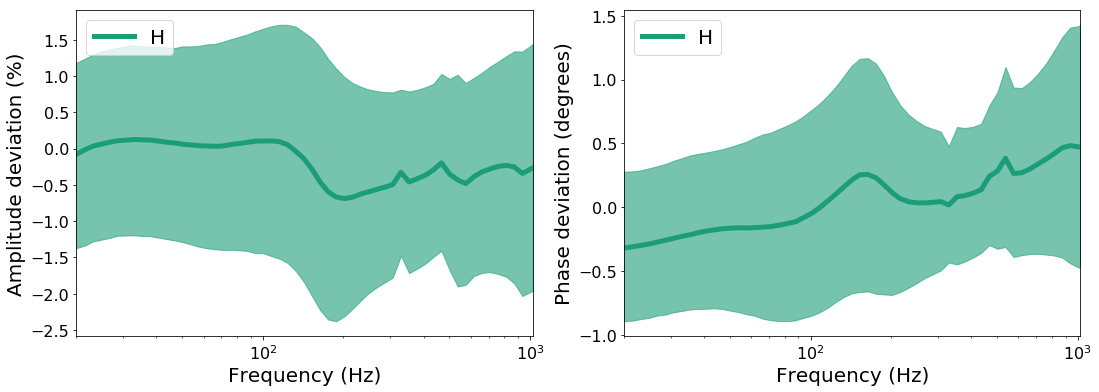

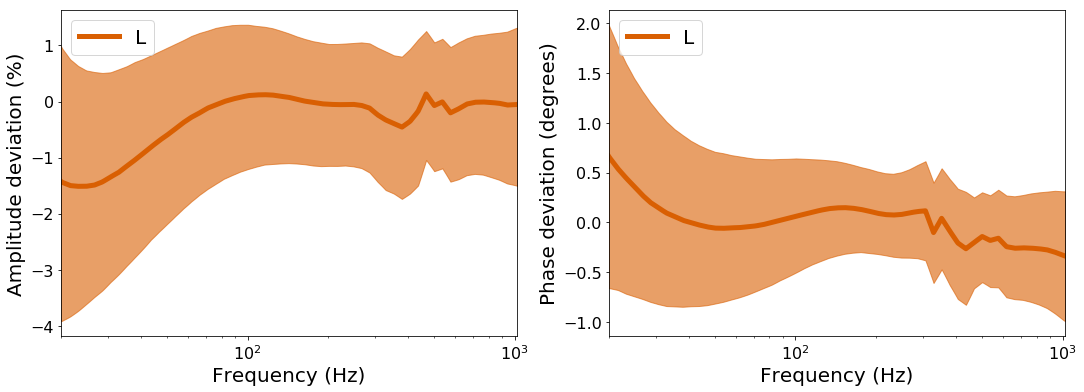

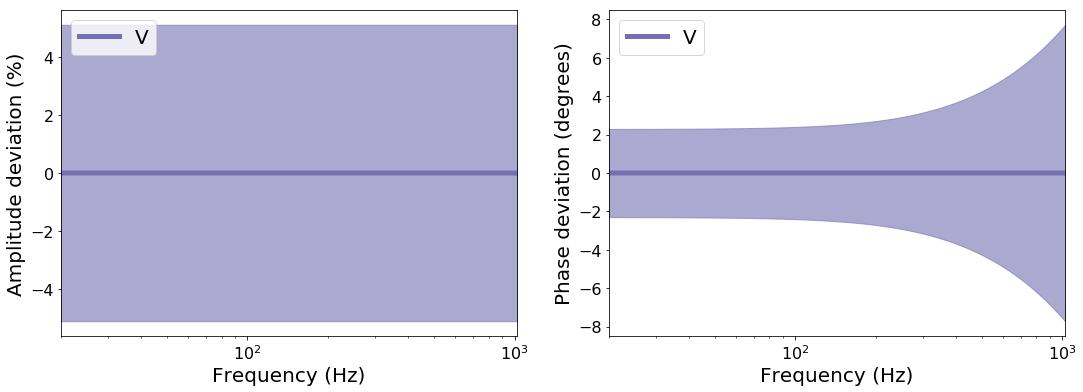

In [3]:
f = np.arange(20,1024,1./4)

CalEnv_plot('GWTC1_GW170814_CalEnv/GWTC1_GW170814_H_CalEnv.txt', f)

CalEnv_plot('GWTC1_GW170814_CalEnv/GWTC1_GW170814_L_CalEnv.txt', f)

CalEnv_plot('GWTC1_GW170814_CalEnv/GWTC1_GW170814_V_CalEnv.txt', f)